In [5]:
import numpy as np
import pandas as pd
from pandas import datetime
import datetime
from snownlp import SnowNLP
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import ast

<ipython-input-5-041d7e434e47>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [22]:
detail = pd.read_excel('/home/afan/emotion_analysis/data/detail.xlsx')

In [3]:
content = detail[['pub_time','content']]
content.pub_time = '2020-' + content.pub_time +':00'
content.pub_time = pd.to_datetime(content.pub_time)
content = content.dropna()

/home/afan/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
content_temp = content

In [27]:
content

,pub_time,content
0,2019-12-31 00:00:00,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...
1,2019-12-31 00:00:00,周四鸡蛋会跌停吗？
2,2019-12-31 00:00:00,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...
3,2019-12-31 00:00:00,2020静待花开
4,2019-12-31 00:03:00,祝曙光的朋友们新年快乐，20年身体健康投资顺利
...,...,...
642698,2020-07-27 22:41:00,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...
642699,2020-07-27 22:42:00,买一手多，涨一个点，能赚多少钱
642700,2020-07-27 22:44:00,哎，割肉了，不碰它了
642701,2020-07-27 22:46:00,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...


# Adjust the date

In [7]:
# Date -1 if time before 9:30. 
for i in tqdm(range(len(content_temp)), position=0, leave=True):
    row = content_temp.iloc[i]
    if pd.to_datetime(row.pub_time.strftime('%H:%M')) < pd.to_datetime('9:30:00'):
        row.pub_time = row.pub_time -   datetime.timedelta(days=1)
    content_temp.iloc[i] = row

  0%|          | 0/642703 [00:00<?, ?it/s]/home/afan/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
100%|██████████| 642703/642703 [5:33:51<00:00, 32.09it/s]


In [10]:
content_temp.to_csv('/home/afan/emotion_analysis/data/processed_data/detail_with_adjusted_date.csv',index=False)

In [2]:
content = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/detail_with_adjusted_date.csv') 

In [6]:
x = content.content

In [8]:
range(0,10)

range(0, 200000)

In [12]:
detail_score=[]
for i in tqdm(range(0,200000), position=0, leave= True):
    s= SnowNLP(x[i])
    detail_score.append(s.sentiments)


100%|██████████| 200000/200000 [1:47:26<00:00, 31.02it/s] 


In [14]:
score_df1 = pd.DataFrame(detail_score)

In [16]:
score_df1.columns = ['scores']

In [18]:
score_df1.to_csv('/home/afan/emotion_analysis/data/processed_data/score1',index=False)

In [19]:
s1 = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/score1')
s2 = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/score2')
s3 = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/score3')

In [20]:
score_df = pd.concat([s1,s2, s3]).reset_index(drop=True)

In [21]:
score_df

,scores
0,1.000000
1,0.115674
2,0.999999
3,0.276648
4,0.999973
...,...
642698,0.999717
642699,0.448511
642700,0.051191
642701,1.000000


In [35]:
detail_scores = pd.concat([content,score_df], axis = 1)
detail_scores

,pub_time,content,scores
0,2019-12-31 00:00:00,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...,1.000000
1,2019-12-31 00:00:00,周四鸡蛋会跌停吗？,0.115674
2,2019-12-31 00:00:00,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...,0.999999
3,2019-12-31 00:00:00,2020静待花开,0.276648
4,2019-12-31 00:03:00,祝曙光的朋友们新年快乐，20年身体健康投资顺利,0.999973
...,...,...,...
642698,2020-07-27 22:41:00,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...,0.999717
642699,2020-07-27 22:42:00,买一手多，涨一个点，能赚多少钱,0.448511
642700,2020-07-27 22:44:00,哎，割肉了，不碰它了,0.051191
642701,2020-07-27 22:46:00,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...,1.000000


In [39]:
detail[['read_num','comment_num','pub_time','content']].dropna()

,read_num,comment_num,pub_time,content
0,7286,61,01-01 00:00,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...
1,1546,7,01-01 00:00,周四鸡蛋会跌停吗？
2,3526,11,01-01 00:00,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...
3,1277,146,01-01 00:00,2020静待花开
4,3214,28,01-01 00:03,祝曙光的朋友们新年快乐，20年身体健康投资顺利
...,...,...,...,...
652792,4891,15,07-27 22:41,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...
652793,287,1,07-27 22:42,买一手多，涨一个点，能赚多少钱
652794,430,4,07-27 22:44,哎，割肉了，不碰它了
652795,1691,14,07-27 22:46,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...


In [52]:
weight = pd.DataFrame(detail[['read_num','comment_num','content']].dropna()).reset_index(drop=True)
weight = weight[['read_num','comment_num']]
weight

,read_num,comment_num
0,7286,61
1,1546,7
2,3526,11
3,1277,146
4,3214,28
...,...,...
642698,4891,15
642699,287,1
642700,430,4
642701,1691,14


In [46]:
detail_scores = pd.concat([detail_scores,weight], axis = 1)

In [47]:
detail_scores

,pub_time,content,scores,read_num,comment_num
0,2019-12-31 00:00:00,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...,1.000000,7286,61
1,2019-12-31 00:00:00,周四鸡蛋会跌停吗？,0.115674,1546,7
2,2019-12-31 00:00:00,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...,0.999999,3526,11
3,2019-12-31 00:00:00,2020静待花开,0.276648,1277,146
4,2019-12-31 00:03:00,祝曙光的朋友们新年快乐，20年身体健康投资顺利,0.999973,3214,28
...,...,...,...,...,...
642698,2020-07-27 22:41:00,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...,0.999717,4891,15
642699,2020-07-27 22:42:00,买一手多，涨一个点，能赚多少钱,0.448511,287,1
642700,2020-07-27 22:44:00,哎，割肉了，不碰它了,0.051191,430,4
642701,2020-07-27 22:46:00,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...,1.000000,1691,14


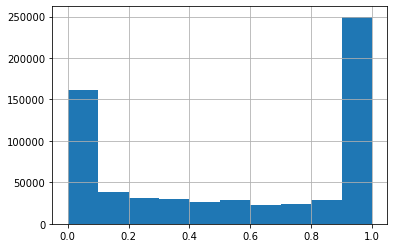

In [48]:
score_dist= detail_scores.scores.hist().get_figure()

In [49]:
detail_scores.scores.describe()

count    642703.000000
mean          0.560342
std           0.411034
min           0.000000
25%           0.098853
50%           0.616735
75%           0.999927
max           1.000000
Name: scores, dtype: float64

In [66]:
detail_scores['Date'] = pd.to_datetime(detail_scores.pub_time).dt.date

In [67]:
detail_scores

,pub_time,content,scores,read_num,comment_num,Date
0,2019-12-31 00:00:00,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...,1.000000,7286,61,2019-12-31
1,2019-12-31 00:00:00,周四鸡蛋会跌停吗？,0.115674,1546,7,2019-12-31
2,2019-12-31 00:00:00,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...,0.999999,3526,11,2019-12-31
3,2019-12-31 00:00:00,2020静待花开,0.276648,1277,146,2019-12-31
4,2019-12-31 00:03:00,祝曙光的朋友们新年快乐，20年身体健康投资顺利,0.999973,3214,28,2019-12-31
...,...,...,...,...,...,...
642698,2020-07-27 22:41:00,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...,0.999717,4891,15,2020-07-27
642699,2020-07-27 22:42:00,买一手多，涨一个点，能赚多少钱,0.448511,287,1,2020-07-27
642700,2020-07-27 22:44:00,哎，割肉了，不碰它了,0.051191,430,4,2020-07-27
642701,2020-07-27 22:46:00,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...,1.000000,1691,14,2020-07-27


In [68]:
detail_scores.to_csv('/home/afan/emotion_analysis/data/processed_data/details_scores.csv', index = False)

In [ ]:
detail_scores = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/details_scores.csv')

In [79]:
days_list = sorted(pd.unique(detail_scores.Date))
len(days_list)

210

In [85]:
base = pd.DataFrame(detail_scores.groupby('Date')['scores'].mean())

In [86]:
base

,scores
Date,
2019-12-31,0.603355
2020-01-01,0.542524
2020-01-02,0.529936
2020-01-03,0.516495
2020-01-04,0.623234
...,...
2020-07-23,0.567831
2020-07-24,0.551124
2020-07-25,0.598155


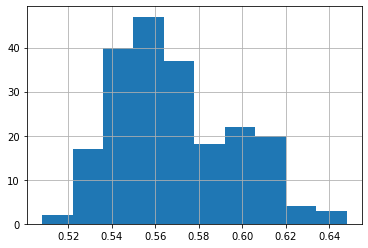

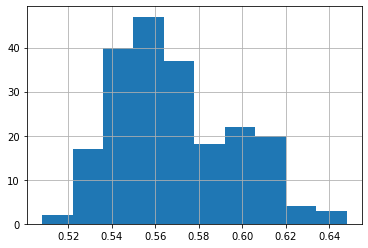

In [88]:
base.scores.hist().get_figure()

In [91]:
sentiment = []
for i in tqdm(range(len(detail_scores)), position=0, leave= True):
    row = detail_scores.iloc[i]
    if row.scores < 0.4:
        sentiment.append(-1)
    elif row.scores > 0.6:
        sentiment.append(1)
    else:
        sentiment.append(0)

100%|██████████| 642703/642703 [01:19<00:00, 8060.23it/s]


In [92]:
detail_scores['sentiment'] = sentiment
detail_scores

,pub_time,content,scores,read_num,comment_num,Date,sentiment
0,2019-12-31 00:00:00,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...,1.000000,7286,61,2019-12-31,1
1,2019-12-31 00:00:00,周四鸡蛋会跌停吗？,0.115674,1546,7,2019-12-31,-1
2,2019-12-31 00:00:00,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...,0.999999,3526,11,2019-12-31,1
3,2019-12-31 00:00:00,2020静待花开,0.276648,1277,146,2019-12-31,-1
4,2019-12-31 00:03:00,祝曙光的朋友们新年快乐，20年身体健康投资顺利,0.999973,3214,28,2019-12-31,1
...,...,...,...,...,...,...,...
642698,2020-07-27 22:41:00,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...,0.999717,4891,15,2020-07-27,1
642699,2020-07-27 22:42:00,买一手多，涨一个点，能赚多少钱,0.448511,287,1,2020-07-27,0
642700,2020-07-27 22:44:00,哎，割肉了，不碰它了,0.051191,430,4,2020-07-27,-1
642701,2020-07-27 22:46:00,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...,1.000000,1691,14,2020-07-27,1


In [93]:
detail_scores.to_csv('/home/afan/emotion_analysis/data/processed_data/details_scores_with_sentiment.csv', index = False)

In [ ]:
detail_score = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/details_scores_with_sentiment.csv')

In [138]:
sentiment_count = detail_scores.groupby(['Date','sentiment'])['sentiment'].count()
sentiment_count

Date        sentiment
2019-12-31  -1            83
             0            24
             1           132
2020-01-01  -1           650
             0           127
                        ... 
2020-07-26   0            71
             1           564
2020-07-27  -1           681
             0           170
             1           771
Name: sentiment, Length: 630, dtype: int64

In [139]:
sentiment_count = sentiment_count.unstack()

In [140]:
sentiment_count

sentiment,-1,0,1
Date,,,
2019-12-31,83,24,132
2020-01-01,650,127,746
2020-01-02,1789,466,1936
2020-01-03,1851,467,1876
2020-01-04,413,76,685
...,...,...,...
2020-07-23,1566,314,2014
2020-07-24,1267,263,1530
2020-07-25,425,66,645


In [141]:
sentiment_count.to_csv('/home/afan/emotion_analysis/data/processed_data/sentiment_count.csv',index=True)

In [142]:
sentiment_count = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/sentiment_count.csv')

In [147]:
sentiment_count.head(60)

,Date,-1,0,1
0,2019-12-31,83,24,132
1,2020-01-01,650,127,746
2,2020-01-02,1789,466,1936
3,2020-01-03,1851,467,1876
4,2020-01-04,413,76,685
5,2020-01-05,488,98,691
6,2020-01-06,1759,401,1882
7,2020-01-07,1839,489,1964
8,2020-01-08,1874,467,1980
9,2020-01-09,1927,510,2019


In [144]:
sentiment_count['Date'] = pd.to_datetime(sentiment_count.Date)

In [150]:
rate1 = sentiment_count['1']/sentiment_count['-1']
rate1.mean()


1.3086131690101515

In [185]:
rate1.median()

1.2639210010173794

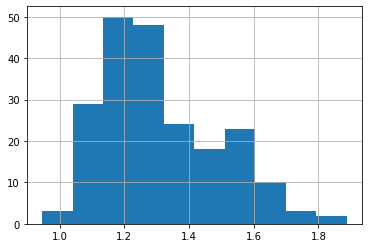

In [183]:
rate_fig = rate1.hist().get_figure()

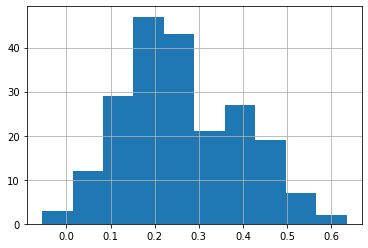

In [184]:
rate_fig = np.log(rate1).hist().get_figure()

In [153]:
sum1 = sentiment_count['-1']+sentiment_count['0']+sentiment_count['1']
sum1

0       239
1      1523
2      4191
3      4194
4      1174
       ... 
205    3894
206    3060
207    1136
208    1045
209    1622
Length: 210, dtype: int64

In [103]:
sz = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/szzh2020.csv')
sz

,date,收盘
0,2020-12-31,"3,473.07"
1,2020-12-30,"3,414.45"
2,2020-12-29,"3,379.04"
3,2020-12-28,"3,397.29"
4,2020-12-25,"3,396.56"
...,...,...
238,2020-1-8,"3,066.89"
239,2020-1-7,"3,104.80"
240,2020-1-6,"3,083.41"
241,2020-1-3,"3,083.79"


In [216]:
# the total number of days of trading day is 134.
# From 2020-1-6 to 2020-7-27
day_list = sorted(pd.to_datetime(sz.date))[2:136]   
len(day_list)

134

In [238]:
def get_positions (length):
    window_len = length
    position = [] # l = 1
    for i in range(len(day_list)):
        date  = day_list[i]
        ind = sentiment_count[sentiment_count.Date == date].index[0]
        window = sentiment_count.iloc[ind-window_len:ind]
        rate = window.sum()[2]/window.sum()[0]
        if rate < 1.2:
            position.append(-1)
        elif rate >1.3:
            position.append(1)
        else:
            position.append(0)
    return position

In [236]:
def get_sentiment_factor (length):
    position = pd.DataFrame()
    position['date'] = day_list
    position['position'] = get_positions(length)
    position = position.set_index('date')
    return position

In [240]:
get_sentiment_factor(2).to_csv('/home/afan/emotion_analysis/sentiment_factor/positions.csv', index = True)